In [1]:
import scipy.io as spio
import pysptools.eea as eea
import pysptools.abundance_maps as amp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
urban = spio.loadmat('Urban_R162.mat')  
urban

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Oct 22 16:51:08 2014',
 '__version__': '1.0',
 '__globals__': [],
 'SlectBands': array([[  5],
        [  6],
        [  7],
        [  8],
        [  9],
        [ 10],
        [ 11],
        [ 12],
        [ 13],
        [ 14],
        [ 15],
        [ 16],
        [ 17],
        [ 18],
        [ 19],
        [ 20],
        [ 21],
        [ 22],
        [ 23],
        [ 24],
        [ 25],
        [ 26],
        [ 27],
        [ 28],
        [ 29],
        [ 30],
        [ 31],
        [ 32],
        [ 33],
        [ 34],
        [ 35],
        [ 36],
        [ 37],
        [ 38],
        [ 39],
        [ 40],
        [ 41],
        [ 42],
        [ 43],
        [ 44],
        [ 45],
        [ 46],
        [ 47],
        [ 48],
        [ 49],
        [ 50],
        [ 51],
        [ 52],
        [ 53],
        [ 54],
        [ 55],
        [ 56],
        [ 57],
        [ 58],
        [ 59],
        [ 60],
       

In [3]:
urban_data = urban['Y']
urban_data = urban_data.T.reshape(307,307,162)
urban_data.shape

(307, 307, 162)

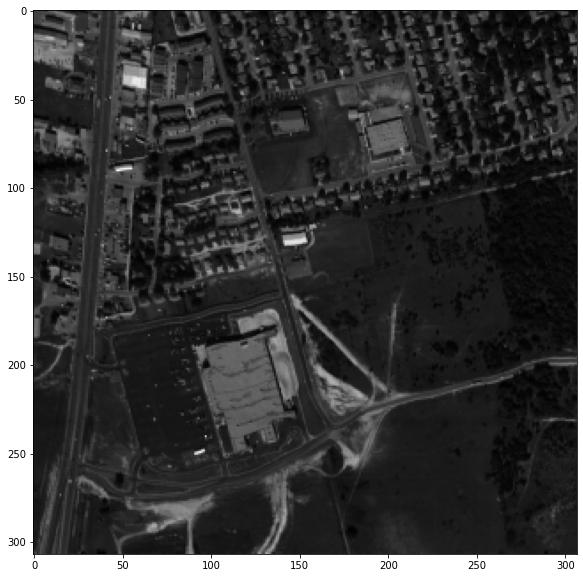

In [4]:
fig = plt.figure(figsize =(10,10))
urban_data = (255 * (urban_data.astype(np.float32) - urban_data.min())/(urban_data.max() - urban_data.min())).astype(np.uint8)
plt.imshow(urban_data[:,:,50], cmap='gray')

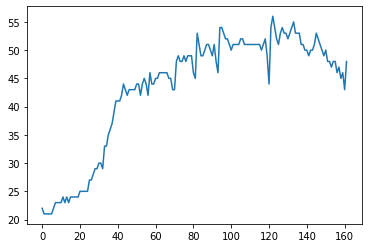

In [5]:
rr,cc = 50,50
spectrum = urban_data[rr,cc,:]
plt.plot(spectrum)

[(56, 8), (306, 306), (105, 102), (97, 102)]


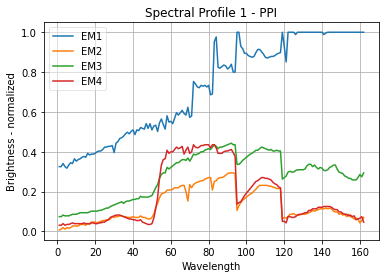

In [6]:
ppi = eea.PPI()
urban_ppi = ppi.extract(urban_data, 4, numSkewers=10000, normalize=True, mask=None)                   #U is a numpy array with dimensions (16,200)
indexes =  ppi.get_idx()
print(indexes)
ppi.display()

In [7]:
urban_ppi.shape

(4, 162)

(307, 307, 4)


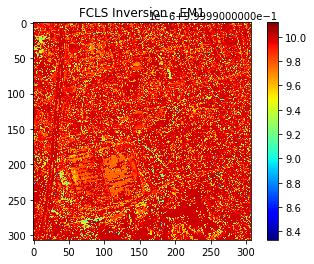

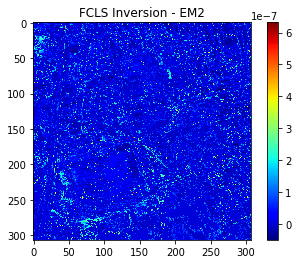

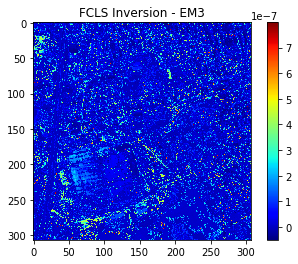

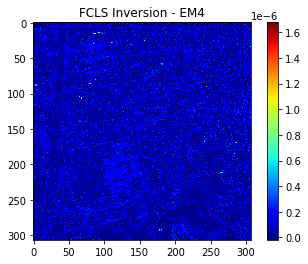

<Figure size 432x288 with 0 Axes>

In [10]:
fcls_ppi = amp.FCLS()                                         #FCLS abundance estimation
amap_ppi = fcls_ppi.map(urban_data, urban_ppi, normalize=False, mask=None)
print(amap_ppi.shape)
fcls_ppi.display(mask=None, interpolation='none', colorMap='jet', columns=4, suffix=None)

## PPNM

In [12]:
import torch

h = torch.Tensor(amap_ppi)
j = torch.Tensor(urban_ppi)
print(h.shape)
print(j.shape)

torch.Size([307, 307, 4])
torch.Size([4, 162])


In [13]:
ppnm = torch.sigmoid(torch.matmul(h, j))
ppnm.shape

torch.Size([307, 307, 162])

In [14]:
ppnm = ppnm*256
ppnm.max()

tensor(187.1510)

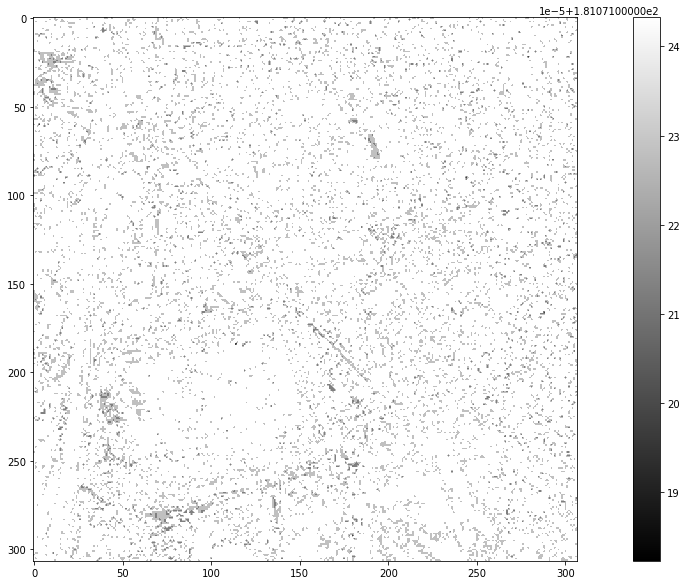

In [15]:
plt.figure(figsize=(20,10))
plt.imshow(ppnm[:,:,100], cmap='gray')
plt.colorbar()

## Bilinear

In [16]:
bilinear = torch.matmul(h, j) +  0.5 * torch.matmul((h * h), (j * j))   # Hadamard Product
bilinear.shape

torch.Size([307, 307, 162])

In [17]:
bilinear = bilinear*256
bilinear.max()

tensor(384.0001)

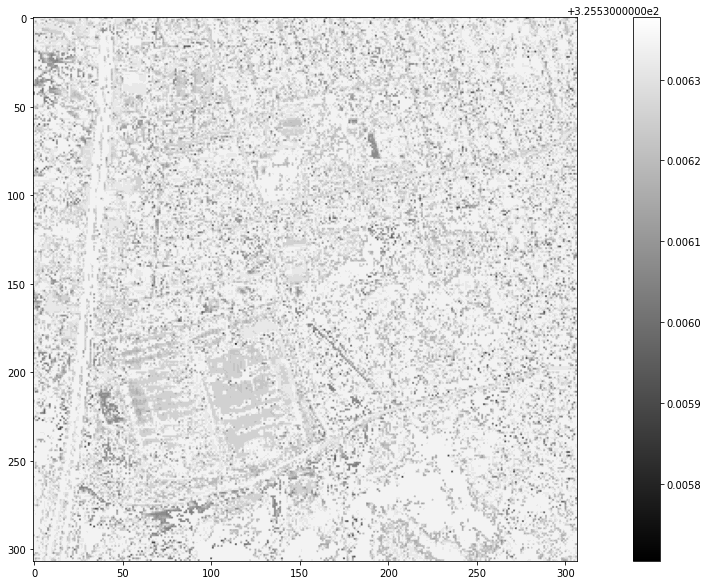

In [18]:
plt.figure(figsize=(20,10))
plt.imshow(bilinear[:,:,100], cmap='gray')
plt.colorbar()